<a href="https://colab.research.google.com/github/felstuff/BackToBasic/blob/master/Titanic_Solution_with_MinSuk_Heo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic : Machine Learning fr Disaster 

Video Link: https://www.youtube.com/watch?v=3eTSVGY_fIE&t=15s

**Predict survival on the Titanic** 


*   Defining the problem statement 
*   Collecting the data 
*   Exploratory data analysis
*   Feature engineering
*   Feature selection
*   Modelling
*   Testing











**Load Train, and Test dataset using Pandas**



In [56]:
import pandas as pd

train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
test.head()

#used to import data, hence everything else you used to trained after have to be pandas  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Dictionary**

*   Survived: 0 = No; 1 = Yes
*   pclass: Ticket Class 1=1st; 2=2nd; 3=3rd 
*   Sibsp: # of sibiling/ spouse on board of Titanic 
*   parch: # of parents/ children on board of Titanic 
*   Ticket: Ticket Number 
*   Cabin: Cabin Number 
*   Embarked: Port of entry C = Cherbourg; Q = Queenstown, S = Southampton 



**Total rows and columns**

We can see that there are 892 rows and 12 columns in our training dataset 


In [57]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
train.shape
#this is only for pandas (pd) library, to tell you how many row and columns in the train dataset  

(891, 12)

In [59]:
test.shape

(418, 11)

In [60]:
train.info()
#if without the "()" it will show you the list of data on the csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
test.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Import Python Library for Visualisation 

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set () #setting seaborn default for plots 

**Bar Chart for Categorical Features**

*   Pclass
*   Sex
*   SibSp (# of siblings & spouse)
*   Parch (# of parents and children)
*   Embarked
*   Cabin 

In [65]:
def bar_chart(feature): 
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0] [feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

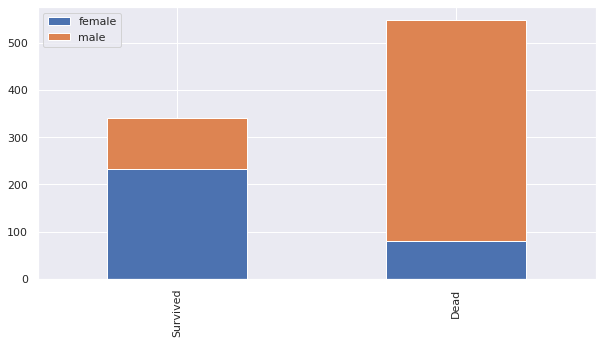

In [66]:
bar_chart('Sex')
# result shows that women are more likely to survive compared to men 

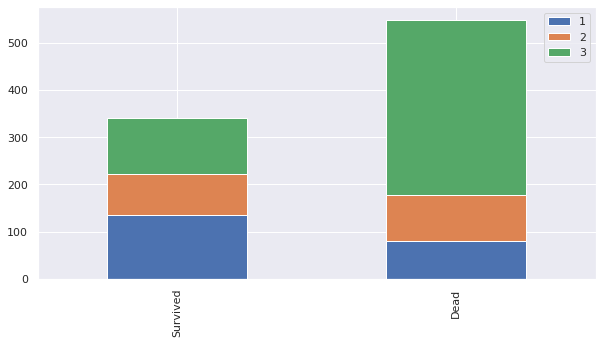

In [67]:
bar_chart('Pclass')
#result shows that people from the first ckass cabin will be more likely to survive 

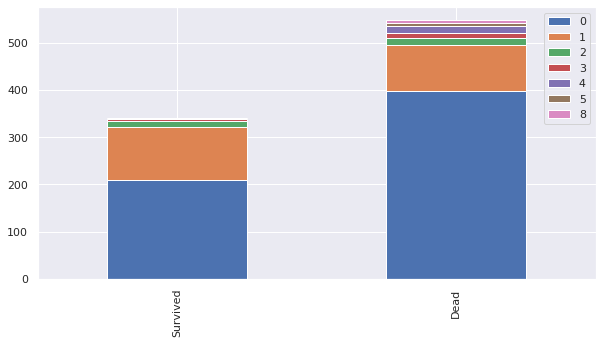

In [68]:
bar_chart('SibSp')
#this resuly shows that people who boarded the ship with two or more siblings or 
# with a spouse are more likely to survive

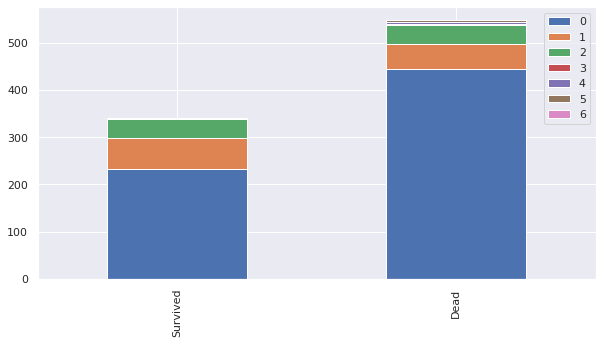

In [69]:
bar_chart('Parch')
# anyone who boarded with more than 2 parents or children are more likely to survive
# compared to someone who boarded alone  

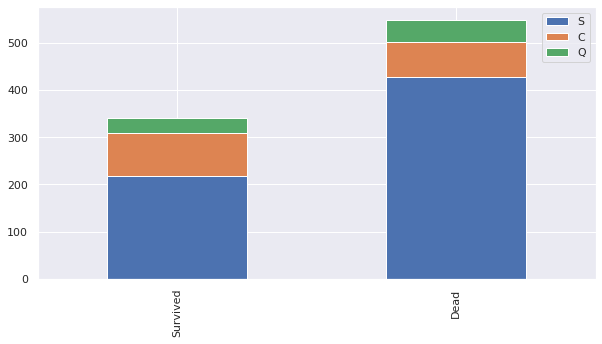

In [70]:
bar_chart('Embarked')
# the result shows that those who embarked from location "S" is the mostly to survive

**Feature Engineering**

Video link : https://www.youtube.com/watch?v=COUWKVf6zKY

Feature engineering is the process of using domain knowledge of the data to create fetures (*feature vectors*) that make ML algorithms works. 

*Feature Vectors* is an n-dimensional vector of numerical features that represent some object. Many algorithms in ML require a numerical representation of objects, since such represenatation facilitate processing and statistical analysis. 

Hence in this section, it will fill out the missing field, changing the gender into numerical vaule so the machine is able to read & process it. 

In [71]:
train.head()
# Features are the columns e.g. "PassengerId", "Pclass", "Sex" i.e. 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Name 

In [72]:
train_test_data = [train,test]  # combining train and test dataset to extract title 

for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
  # "([A-Za-z]+)\." - is known as a Regex AKA Regular Expression; can learn to 
  # build your own Regexon this site: https://regexone.com/ otherwise can jst google for it

In [73]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Lady          1
Jonkheer      1
Ms            1
Mme           1
Don           1
Countess      1
Capt          1
Name: Title, dtype: int64

In [74]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

**Title Mapping** 
*   Mr : 0 
*   Miss : 1
*   Mrs : 2
*   Others : 3 

In [75]:
title_mapping = {"Mr":0, "Miss":1, "Mrs": 2 , 
                "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3, "Countess":3,
                 "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, 
                 "Sir":3}
for dataset in train_test_data: 
    dataset['Title'] = dataset['Title'].map(title_mapping) 

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [77]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


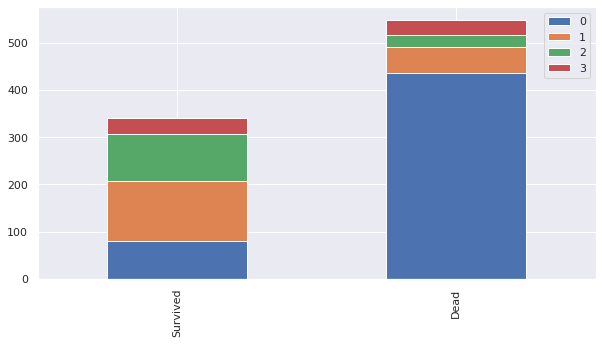

In [78]:
bar_chart('Title')

In [79]:
# Delete unnecessary features from dataset 
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [81]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


**Gender**

*  Male: 0 
*  Female: 1



In [82]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

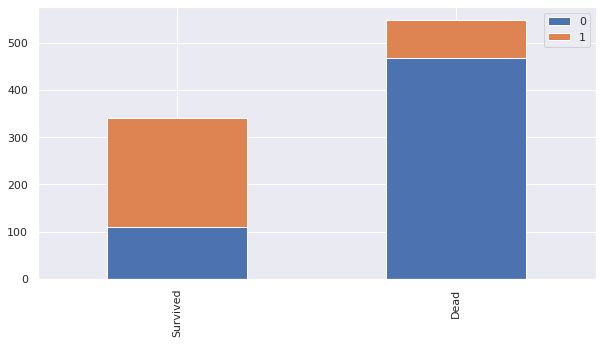

In [83]:
bar_chart('Sex')

**Age**

Some age are missing, let's use Title's Median Age for missing age

In [84]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


In [85]:
#fill missing age with median age for each title (Mr,Mrs, Miss, Other)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)
#generally using single or double inverted commas wldn't really make a different;
#BUT usually double inverted commas refer to header of the column; 
#whereas single is for string, BUT if the string already has inverted comma in it then have to use double.

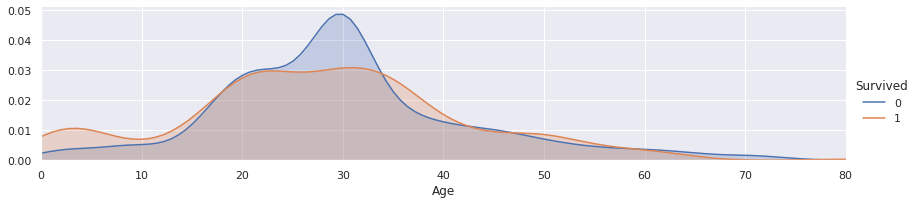

In [86]:
#FacetGrid is one of the funtion in Seaborn library, that allows you 
#to visualise dataset that has many columns that are categorical (categorical data allows you to divide them into bins
# e.g. age group, education level, gender i.e.)
#hence allow us to create lots of mini plots 

facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

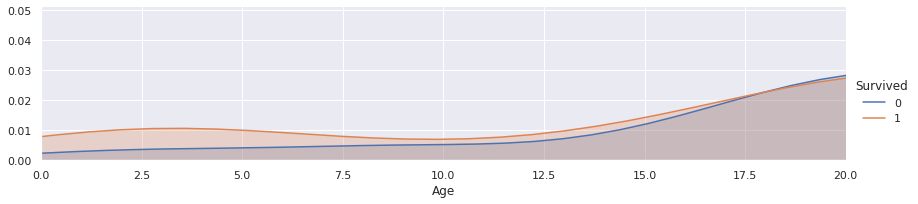

In [87]:
facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 30.0)

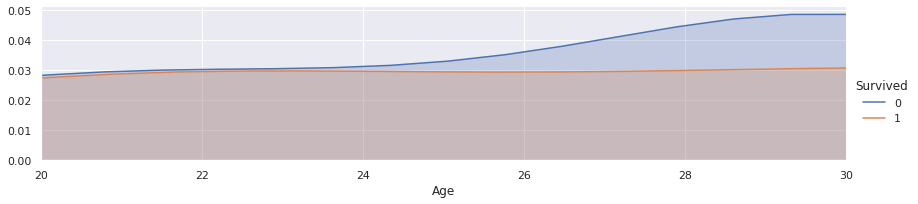

In [88]:
facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(20,30)

(30.0, 40.0)

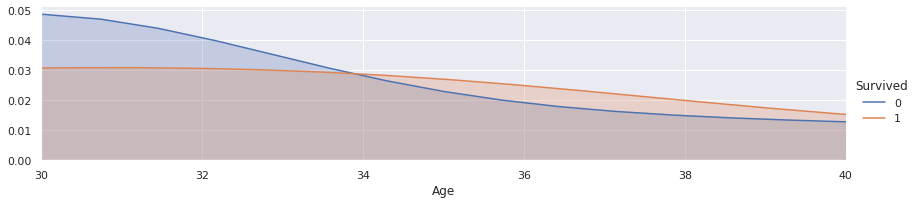

In [89]:
facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(30,40)

(40.0, 60.0)

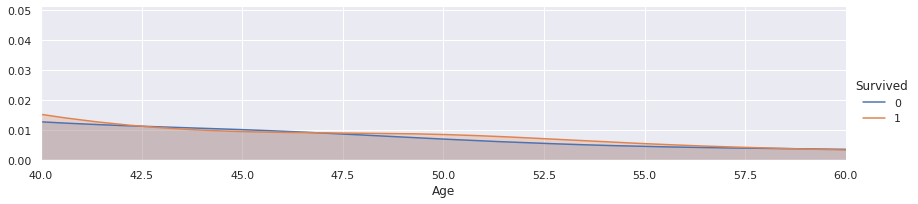

In [90]:
facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(40,60)

(60.0, 80.0)

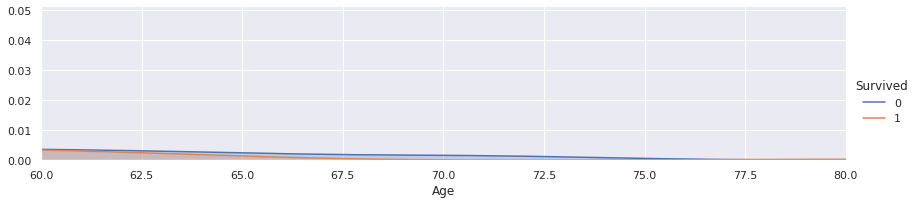

In [91]:
facet = sns.FacetGrid(train,hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(60)

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


**Binning**

Binning/converting Numerial Age to Categorical Variable

Feature vector map: 

Child:0,  Young:1, Adult:2, Mid-Age:3, Senior:4  


In [94]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <=16, "Age"]=0,
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <=26),"Age"] = 1, 
    dataset.loc[(dataset["Age"] > 26) & (dataset["Age"] <=36),"Age"] = 2, 
    dataset.loc[(dataset["Age"] > 36) & (dataset["Age"] <=62),"Age"] = 3,
    dataset.loc[dataset["Age"] > 62, "Age"] =4  

In [95]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [96]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


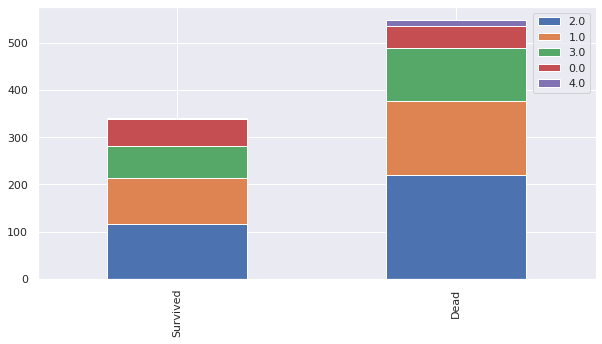

In [97]:
bar_chart("Age")